In this notebook I am testing the results of the initial docking run. I made sure that all molecules are parsable and all results seem reasonable. There are 65 crashes which I am further investigating but besides that, everything looks fine!

In [5]:
import h5py
import json
import pandas as pd

pdb = '5k00'

with h5py.File('h5_test/' + pdb + '.h5', 'r') as file:
    print(file.keys())
    print(file['poses'].keys())
    print(file['ligand_sdf'][()])
    print(json.loads(file['scfx_weights'][()]))
    print(json.loads(file['atmname_to_idx'][()]))
    data = file['poses']['results']
    names = file['poses']['row_names'].asstr()[()]
    headers = file['poses']['results'].attrs['column_names']
    df = pd.DataFrame(data, columns=headers)
    df.insert(loc=0, column='type', value=names)
df

<KeysViewHDF5 ['atmname_to_idx', 'ligand_sdf', 'pdb_strings', 'poses', 'protocol', 'results', 'scfx_weights']>
<KeysViewHDF5 ['pdb_strings', 'results', 'row_names']>
b'5k00_ligand\n     RDKit          3D\n\n 77 81  0  0  1  0  0  0  0  0999 V2000\n   -7.8180   -4.8980    9.5280 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -9.3360   -8.7820    8.0470 O   0  0  0  0  0  0  0  0  0  0  0  0\n    1.1190  -11.9050   -1.6830 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -5.1060  -10.9920    3.5510 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.5760  -13.7230    7.1110 N   0  0  1  0  0  0  0  0  0  0  0  0\n   -3.8140   -7.7800    1.3090 N   0  0  0  0  0  0  0  0  0  0  0  0\n   -8.9990   -6.5670    8.0190 N   0  0  0  0  0  0  0  0  0  0  0  0\n   -3.6770  -10.0440    1.9690 N   0  0  0  0  0  0  0  0  0  0  0  0\n   -9.2680   -4.7800   11.2150 N   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.1720   -9.2010    0.5290 N   0  0  0  0  0  0  0  0  0  0  0  0\n    1.1560  -11.0140   -2.7940 C   0  0  1

,type,total_score,idelta_score,rmsd_to_crystal,rmsd_to_input,prepare_time,raw_fa_atr,raw_fa_rep,raw_fa_sol,raw_fa_intra_rep,...,raw_delta_atom_pair_constraint,raw_delta_coordinate_constraint,raw_delta_angle_constraint,raw_delta_dihedral_constraint,raw_delta_rama,raw_delta_omega,raw_delta_fa_dun,raw_delta_p_aa_pp,raw_delta_ref,raw_delta_chainbreak
0,crystal,-910.901062,-25.301125,0.000000e+00,0.0,0.134112,-1712.641235,426.761841,1024.208618,645.427856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,relax,-910.901062,-25.301125,0.000000e+00,0.0,0.106670,-1712.641235,426.761841,1024.208618,645.427856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,apo_relax,-885.599915,0.000000,7.040841e-14,0.0,0.108155,-1662.404053,410.092743,999.049072,645.427856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from data import PDBRinterface

results = PDBRinterface('h5_test')
res = results.get_result(pdb)

print(res.docking_pdb_updates[0])

res.docking_df

{'259': 'ATOM    250  C   THR A  15      -6.539 -16.546  -2.762  1.00  0.00           C  ', '260': 'ATOM    251  O   THR A  15      -5.625 -17.112  -3.364  1.00  0.00           O  ', '261': 'ATOM    252  CB  THR A  15      -8.434 -18.195  -2.459  1.00  0.00           C  ', '262': 'ATOM    253  OG1 THR A  15      -9.778 -18.506  -2.848  1.00  0.00           O  ', '263': 'ATOM    254  CG2 THR A  15      -8.361 -18.087  -0.943  1.00  0.00           C  ', '265': 'ATOM    256  HA  THR A  15      -8.677 -16.102  -2.746  1.00  0.00           H  ', '266': 'ATOM    257  HB  THR A  15      -7.773 -18.993  -2.797  1.00  0.00           H  ', '267': 'ATOM    258  HG1 THR A  15     -10.046 -19.332  -2.438  1.00  0.00           H  ', '268': 'ATOM    259 1HG2 THR A  15      -8.672 -19.031  -0.497  1.00  0.00           H  ', '269': 'ATOM    260 2HG2 THR A  15      -7.338 -17.862  -0.644  1.00  0.00           H  ', '270': 'ATOM    261 3HG2 THR A  15      -9.022 -17.290  -0.604  1.00  0.00           H  '

,type,total_score,idelta_score,rmsd_to_crystal,rmsd_to_input,prepare_time,raw_fa_atr,raw_fa_rep,raw_fa_sol,raw_fa_intra_rep,...,raw_delta_atom_pair_constraint,raw_delta_coordinate_constraint,raw_delta_angle_constraint,raw_delta_dihedral_constraint,raw_delta_rama,raw_delta_omega,raw_delta_fa_dun,raw_delta_p_aa_pp,raw_delta_ref,raw_delta_chainbreak
0,crystal_docking_std,-984.366455,-30.686543,0.308676,0.308676,2.689451,-1713.062866,407.131897,1025.569946,658.652832,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,relax_docking_std,-990.854736,-33.726574,0.146453,0.146453,2.599180,-1707.667480,396.798096,1020.714172,659.172119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,apo_relax_docking_std,-968.448120,-30.132711,0.139354,0.139354,2.829500,-1710.734863,456.056061,1022.520264,668.089966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
for key in results.results:
    res = results.get_result(key)
    print(len(res.relax_pdb[0].split('\n')), len(res.docking_pdb_updates[0]))

5475 1396


In [9]:
from tqdm import tqdm

failed_keys = []
half_finished = []
successful_keys = []
ideltas = []
rmsds = []
total_scores = []

for key in tqdm(results.results):
    try:
        pdb_entry = results.get_result(key)
    except:
        failed_keys.append(key)
        continue
    docking_df = pdb_entry.docking_df
    relax_df = pdb_entry.relax_df
    if 'apo_relax' not in relax_df.type.values:
        failed_keys.append(key)
        continue
    if 'apo_relax_docking_perturb' not in docking_df.type.values:
        half_finished.append(key)
        continue
    ideltas.append(docking_df.iloc[-1].idelta_score)
    rmsds.append(docking_df.iloc[-1].rmsd_to_input)
    total_scores.append(docking_df.iloc[-1].total_score)
    successful_keys.append(key)

100%|██████████| 1/1 [00:00<00:00, 63.86it/s]


In [10]:
len(failed_keys)

0

In [11]:
len(half_finished)

1

In [12]:
import numpy as np

ideltas = np.array(ideltas)
rmsds = np.array(rmsds)
total_scores = np.array(total_scores)
successful_keys = np.array(successful_keys)

In [13]:
pos_ideltas = ideltas[ideltas > 0]
neg_ideltas = ideltas[ideltas <= 0]

print(len(pos_ideltas), len(neg_ideltas))

0 0


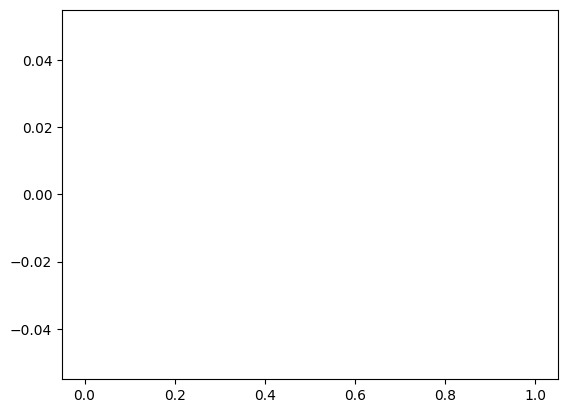

In [14]:
from matplotlib import pyplot as plt

plt.hist(neg_ideltas, bins=40)
plt.show()

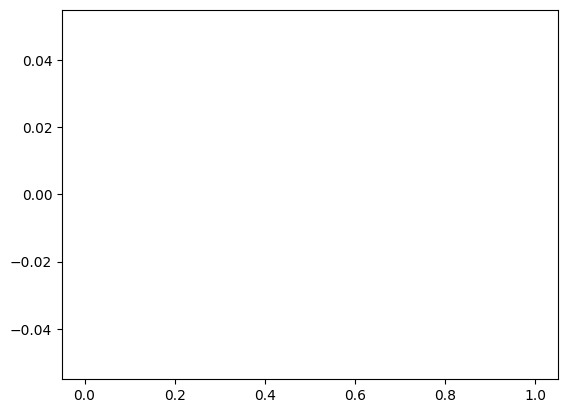

In [15]:
plt.hist(pos_ideltas[pos_ideltas > 20], bins=40)
plt.show()

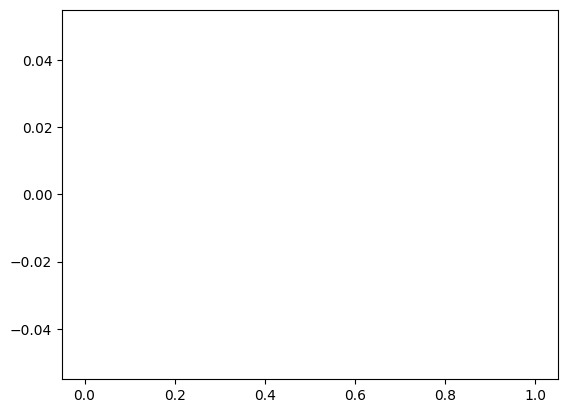

In [16]:
plt.hist(total_scores, bins=40)
plt.show()

In [17]:
len(total_scores[total_scores > 0])

0

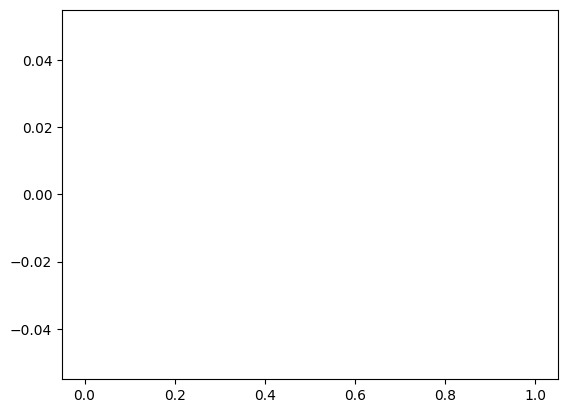

In [18]:
plt.hist(rmsds, bins=40)
plt.show()

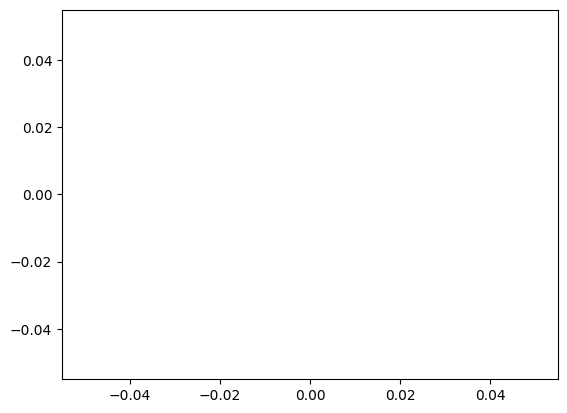

In [19]:
plt.scatter(ideltas[ideltas < 250], rmsds[ideltas < 250])
plt.show()

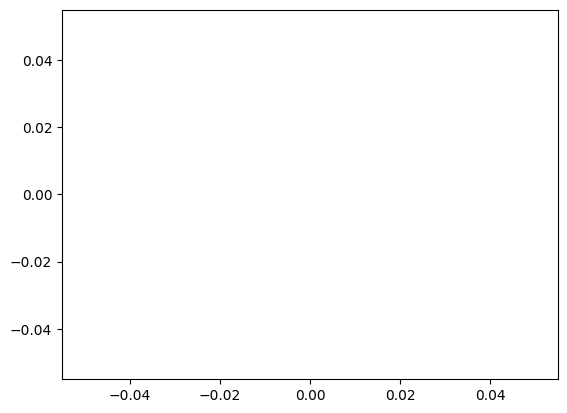

In [20]:
plt.scatter(ideltas[ideltas < 250], total_scores[ideltas < 250])
plt.show()

In [21]:
print(successful_keys[total_scores > 2500])
print(successful_keys[ideltas > 80])

[]
[]


In [22]:
for key in np.concatenate([successful_keys[total_scores > 2500], successful_keys[ideltas > 80]]):
    pdb_entry = results.get_result(key)
    pdb_entry.write_docked_pdb(-1, 'test_out/' + key + '.pdb')
    pdb_entry.write_docked_mol(-1, 'test_out/' + key + '.sdf')
    pdb_entry.write_relax_pdb(0, 'test_out/' + key + '_orig.pdb')
    pdb_entry.write_relaxed_mol(0, 'test_out/' + key + '_orig.sdf')

In [23]:
from rdkit import Chem

no_san_mol = []

for key in tqdm(results.results):
    try:
        try:
            pdb_entry = results.get_result(key)
        except:
            continue
        mol = pdb_entry.mol
        Chem.SanitizeMol(mol)
    except AttributeError:
        no_san_mol.append(key)

100%|██████████| 1/1 [00:00<00:00, 59.33it/s]


In [24]:
len(no_san_mol)

0

In [25]:
len(failed_keys)

0

In [26]:
failed_keys = ['3g2z',
 '4zzz',
 '3px8',
 '3b7u',
 '4hup',
 '3hb4',
 '3s3n',
 '3s3m',
 '2bdj',
 '1h46',
 '5d7x',
 '4oma',
 '4cik',
 '3pb9',
 '1sqi',
 '3px9',
 '4j5c',
 '3nzc',
 '3pb7',
 '4zzx',
 '3ej5',
 '3gws',
 '1tfz',
 '4j5e',
 '4hv7',
 '3ffp',
 '1xzx',
 '2r0u',
 '3pb8',
 '5n9l',
 '4yab',
 '6duk',
 '3kwb',
 '2a0c',
 '4j5d',
 '2o64',
 '4dai',
 '4mx5',
 '3g9l',
 '6a1c',
 '5hlp',
 '4huo',
 '6i3u',
 '2oo8',
 '2cct',
 '3fc1',
 '3g90']

In [27]:
half_finished = ['2y4s',
 '5mk9',
 '6g9b',
 '3ck8',
 '6f6n',
 '2zyn',
 '4yef',
 '6hro',
 '1dmb',
 '6g9i',
 '6f5u',
 '6f6i',
 '2j9n',
 '6f6s',
 '3fi2',
 '5ayf',
 '5mka',
 '6hs4']

In [28]:
import shutil
from pathlib import Path

# Define the directory to clean and the specific subdirectory name
base_dir = Path("pdbbind_cleaned")

remove_keys = failed_keys + half_finished
keep_keys = ['4yef', '3ck8', '5mk9', '1dmb', '2y4s', '2zyn', '5mka']
counter = 0
for key in remove_keys:
    if key in keep_keys: continue
    dir_to_remove = base_dir / key

    if dir_to_remove.exists() and dir_to_remove.is_dir():
        try:
            shutil.rmtree(dir_to_remove)
            print(f"Successfully removed: {dir_to_remove}")
            counter += 1
        except OSError as e:
            print(f"Error: {dir_to_remove} : {e.strerror}")
    else:
        print(f"Directory not found: {dir_to_remove}")

print("Total removes:", counter)


Directory not found: pdbbind_cleaned/3g2z
Directory not found: pdbbind_cleaned/4zzz
Directory not found: pdbbind_cleaned/3px8
Directory not found: pdbbind_cleaned/3b7u
Directory not found: pdbbind_cleaned/4hup
Directory not found: pdbbind_cleaned/3hb4
Directory not found: pdbbind_cleaned/3s3n
Directory not found: pdbbind_cleaned/3s3m
Directory not found: pdbbind_cleaned/2bdj
Directory not found: pdbbind_cleaned/1h46
Directory not found: pdbbind_cleaned/5d7x
Directory not found: pdbbind_cleaned/4oma
Directory not found: pdbbind_cleaned/4cik
Directory not found: pdbbind_cleaned/3pb9
Directory not found: pdbbind_cleaned/1sqi
Directory not found: pdbbind_cleaned/3px9
Directory not found: pdbbind_cleaned/4j5c
Directory not found: pdbbind_cleaned/3nzc
Directory not found: pdbbind_cleaned/3pb7
Directory not found: pdbbind_cleaned/4zzx
Directory not found: pdbbind_cleaned/3ej5
Directory not found: pdbbind_cleaned/3gws
Directory not found: pdbbind_cleaned/1tfz
Directory not found: pdbbind_clean

In [29]:
with open('pdbbind_cleaned/index.txt', "r") as f:
    lines = f.readlines()

len(lines)

11460

In [30]:
counter = 0
with open('pdbbind_cleaned/index.txt', "w") as f:
    for line in lines:
        key = line.split(';')[0]
        if key in remove_keys and key not in keep_keys:
            counter += 1
            continue
        f.write(line)
counter

0

In [31]:
from data import PDBRinterface

pdb = '1G9V_RQ3'

results = PDBRinterface('posebusters_paper_data/astex_h5/')
res = results.get_result(pdb)

print(res.docking_pdb_updates[0])

res.docking_df

ValueError: posebusters_paper_data/astex_h5/ is not a directory. Please check provided path.